# Student Information
## CSI4142 ASSIGNMENT 3 - Classification
## Name: BRUNO KAZADI
## ID: 300210848
## Memebers: lonely
### GROUP: A- 121

#**Classification Empirical Study with Decision Trees**
In this part of the assignment, we are going to perform an empirical study in which we evaluate a decision tree approach on a classification task.

#Dataset Description
This Jupyter Notebook demonstrates a **classification** project aimed at predicting the **Category** of clothing items based on various attributes such as Brand, Color, Size, Material, and Price. It outlines the end-to-end process including data cleaning, exploratory data analysis (EDA), outlier detection, feature engineering, and decision tree modeling with empirical evaluations.

**How to Use:**  
1. Run each notebook cell in sequential order.  
2. Examine the outputs, visualizations, and metrics at each step.  
3. Modify or extend the feature engineering and model hyperparameters as desired.

We worked with a **clothes price prediction dataset**, which includes:
- **Brand:** Name of the clothing brand.  
- **Category:** Type of clothing item (e.g., T-shirt, Jeans, etc.).  
- **Color:** Color of the item.  
- **Size:** Size of the item (e.g., XS, S, M, L, XL).  
- **Material:** Fabric type (e.g., Cotton, Wool, etc.).  
- **Price:** Numerical price of the item.

**How to Use:**  
1. Run each notebook cell in sequential order.  
2. Examine the outputs, visualizations, and metrics at each step.  
3. Modify or extend the feature engineering and model hyperparameters as desired.


In [64]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'https://raw.githubusercontent.com/brunokazadi/CSI4142-A3/refs/heads/main/clothes_price_prediction_data.csv'
df = pd.read_csv(file_path)
print("Dataset shape:", df.shape)
df.head()

# Display dataset information (data types, non-null counts, etc.)
df.info()

# Show basic statistical summary for numerical features
df.describe()


Dataset shape: (1000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000


In [65]:
# Check for missing values across all columns
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64


In [66]:
# Check for duplicate rows and remove them if any exist
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


### Exploratory Data Analysis (EDA)

Dataset shape: (1000, 6)


,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


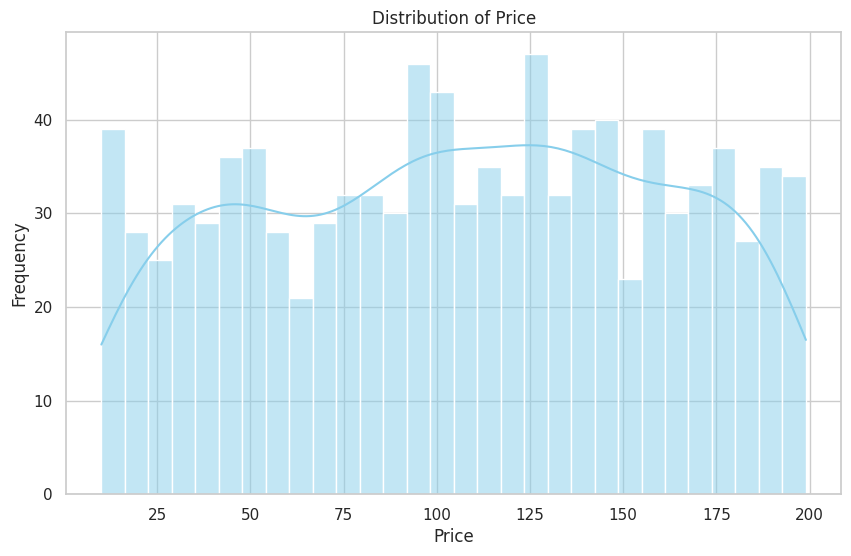

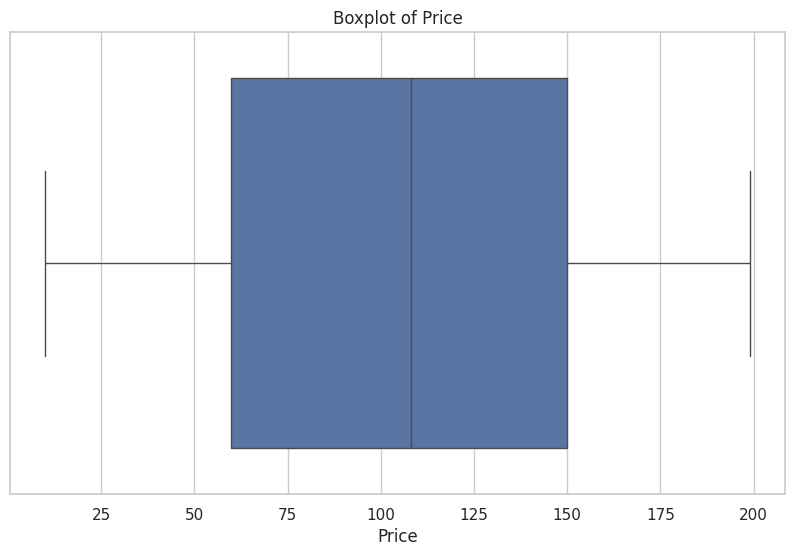

Number of natural outliers (IQR method): 0


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We assume you have already loaded and cleaned the dataset in Task 1, stored in df
# For clarity, we show the shape and head:
print("Dataset shape:", df.shape)
display(df.head())

# Basic distribution of the Price feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Boxplot to inspect potential outliers in Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title("Boxplot of Price")
plt.xlabel("Price")
plt.show()

# Identify natural outliers (if any) via IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

natural_outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print("Number of natural outliers (IQR method):", natural_outliers.shape[0])



Number of outliers detected by LOF: 50


,Brand,Category,Color,Size,Material,Price,LOF_Score,LOF_Factor
77,Under Armour,T-shirt,Red,XXL,Silk,131,-1,-1.160633
88,Reebok,Jeans,Blue,L,Wool,153,-1,-1.221933
94,Reebok,Dress,Red,L,Denim,95,-1,-1.349209
100,Puma,Jeans,Blue,L,Cotton,105,-1,-1.207143
103,New Balance,Sweater,Red,M,Denim,123,-1,-1.135249
123,Adidas,T-shirt,Red,L,Cotton,140,-1,-1.302553
124,Nike,Shoes,White,XL,Wool,131,-1,-1.160633
159,Reebok,Dress,Green,S,Denim,135,-1,-1.209091
169,Reebok,Jeans,Red,XXL,Silk,105,-1,-1.207143
180,Reebok,Jeans,Green,XXL,Denim,131,-1,-1.160633


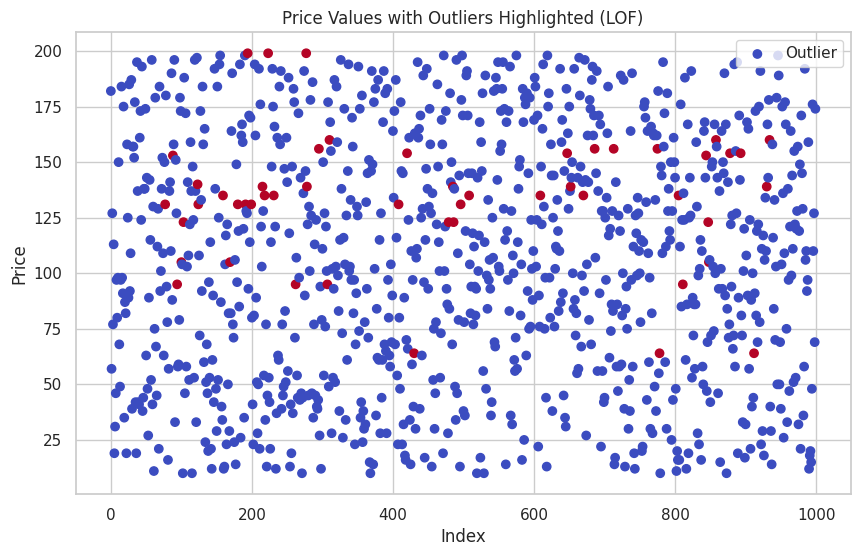

In [68]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Fit and predict on the "Price" feature (reshape into 2D if needed)
df['LOF_Score'] = lof.fit_predict(df[['Price']])
df['LOF_Factor'] = lof.negative_outlier_factor_

# Count and display detected outliers
detected_outliers = df[df['LOF_Score'] == -1]
print("Number of outliers detected by LOF:", detected_outliers.shape[0])
display(detected_outliers.head(10))  # Show first few outliers

# Scatter plot to visualize outliers
plt.figure(figsize=(10, 6))
plt.scatter(x=range(len(df)), y=df['Price'], c=(df['LOF_Score'] == -1), cmap='coolwarm', label='Outlier')
plt.title("Price Values with Outliers Highlighted (LOF)")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()



In [69]:
# Create a new DataFrame excluding outliers
df_no_outliers = df[df['LOF_Score'] != -1].copy()

print("Original dataset shape:", df.shape)
print("Dataset shape after outlier removal:", df_no_outliers.shape)

# (Optional) drop LOF-related columns if you won't need them anymore
df_no_outliers.drop(columns=['LOF_Score', 'LOF_Factor'], inplace=True, errors='ignore')

# Final check
df_no_outliers.info()


Original dataset shape: (1000, 8)
Dataset shape after outlier removal: (950, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     950 non-null    object
 1   Category  950 non-null    object
 2   Color     950 non-null    object
 3   Size      950 non-null    object
 4   Material  950 non-null    object
 5   Price     950 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 52.0+ KB


### Task 3: Predictive Analysis with Decision Trees

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# We assume df_no_outliers is already in memory from Task 2
df = df_no_outliers.copy()

# ---------------------------
# 1) Identify Features and Target
# ---------------------------
# Example: Use 'Category' as the classification target
# Adjust this if your target is different
target_col = 'Category'

# Separate the feature set (X) and the target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# ---------------------------
# 2) Encode Categorical Features
# ---------------------------
# Decision trees can handle numerical features directly,
# so we convert object-type columns to numeric codes.
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# (Similarly, if your target variable is also categorical strings, encode it too)
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)


In [71]:
# ---------------------------
# 3) Baseline Decision Tree
# ---------------------------
tree_baseline = DecisionTreeClassifier(
    criterion='gini',  # or 'entropy'
    max_depth=None,    # no maximum depth
    min_samples_split=2,
    random_state=42    # for reproducibility
)


In [72]:
# Split data into 3 subsets: Train, Validation, and Test
# For demonstration: 60% train, 20% validation, 20% test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

# Fit the baseline model on the training set
tree_baseline.fit(X_train, y_train)

# Evaluate on the validation set
val_score = tree_baseline.score(X_val, y_val)
print(f"Baseline Decision Tree Validation Accuracy: {val_score:.4f}")
display(df.head())


Training set size: 570
Validation set size: 190
Test set size: 190
Baseline Decision Tree Validation Accuracy: 0.2000


,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


###Task 4: Feature Engineering

In [73]:
# We start with the cleaned dataset (df_no_outliers) from Task 3
df_fe = df_no_outliers.copy()

# ---------------------------
# Feature 1: Price_squared
# ---------------------------
# Create a new feature that is the square of the Price column
df_fe['Price_squared'] = df_fe['Price'] ** 2

# ---------------------------
# Feature 2: Relative_Price
# ---------------------------
# This feature compares an item's price to the average price within its Category.
# First, compute the average price per Category using groupby and transform:
df_fe['Category_mean_price'] = df_fe.groupby('Category')['Price'].transform('mean')

# Now, create the relative price as the ratio of the item's price to its category's mean price.
df_fe['Relative_Price'] = df_fe['Price'] / df_fe['Category_mean_price']

# (Optional) Drop the temporary column used for calculation.
df_fe.drop(columns=['Category_mean_price'], inplace=True)

# ---------------------------
# Final Check: Display the first few rows to verify new features
# ---------------------------
print("Dataset with new features:")
display(df_fe.head())

# Optionally, display summary statistics for the new features
print("Summary statistics for new features:")
print(df_fe[['Price', 'Price_squared', 'Relative_Price']].describe())


Dataset with new features:


,Brand,Category,Color,Size,Material,Price,Price_squared,Relative_Price
0,New Balance,Dress,White,XS,Nylon,182,33124,1.600765
1,New Balance,Jeans,Black,XS,Silk,57,3249,0.585590
2,Under Armour,Dress,Red,M,Wool,127,16129,1.117017
3,Nike,Shoes,Green,M,Cotton,77,5929,0.719175
4,Adidas,Sweater,White,M,Nylon,113,12769,1.070795


Summary statistics for new features:
            Price  Price_squared  Relative_Price
count  950.000000     950.000000      950.000000
mean   104.831579   13933.846316        1.000000
std     54.288938   11644.366449        0.517979
min     10.000000     100.000000        0.093399
25%     57.250000    3277.750000        0.543393
50%    104.000000   10816.000000        0.991200
75%    150.000000   22500.000000        1.433445
max    198.000000   39204.000000        2.034154


In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# ---------------------------
# 1. Prepare Datasets for Empirical Study
# ---------------------------
# We'll use two versions:
#   (a) Baseline: df_no_outliers (no feature aggregation)
#   (b) Feature Engineered: df_fe (with additional features)
# Assume these DataFrames are already in memory from previous tasks.
# For our experiment, the target variable is "Category".

target_col = 'Category'

# Function to encode categorical features and target
def encode_features(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    # Encode features that are object type
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    # Encode target if it is categorical
    if y.dtype == 'object':
        le_y = LabelEncoder()
        y = le_y.fit_transform(y)
    return X, y

# Prepare baseline dataset
X_baseline, y_baseline = encode_features(df_no_outliers.copy(), target_col)

# Prepare feature engineered dataset
X_fe, y_fe = encode_features(df_fe.copy(), target_col)

# ---------------------------
# 2. Split Data into Train, Validation, and Test Sets
# ---------------------------
def split_data(X, y):
    # First, separate out the test set (20%)
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    # Split the remaining into training (60% overall) and validation (20% overall)
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval
    )
    return X_train, X_val, X_test, y_train, y_val, y_test

# Split baseline data
X_train_base, X_val_base, X_test_base, y_train_base, y_val_base, y_test_base = split_data(X_baseline, y_baseline)

# Split feature engineered data
X_train_fe, X_val_fe, X_test_fe, y_train_fe, y_val_fe, y_test_fe = split_data(X_fe, y_fe)

print("Baseline Dataset: Train {}, Validation {}, Test {}"
      .format(X_train_base.shape[0], X_val_base.shape[0], X_test_base.shape[0]))
print("Feature Engineered Dataset: Train {}, Validation {}, Test {}"
      .format(X_train_fe.shape[0], X_val_fe.shape[0], X_test_fe.shape[0]))

# ---------------------------
# 3. Baseline Model Evaluation using 4-Fold Cross-Validation
# ---------------------------
# Create baseline Decision Tree (with default settings)
baseline_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

# Combine train and validation sets for cross-validation
X_trainval_base = pd.concat([X_train_base, X_val_base])
y_trainval_base = np.concatenate([y_train_base, y_val_base])

print("Evaluating Baseline System (No Feature Aggregation) with 4-Fold CV:")
cv_scores_baseline = cross_val_score(baseline_tree, X_trainval_base, y_trainval_base, cv=4, scoring='accuracy')
print("Baseline CV Accuracy Scores:", cv_scores_baseline)
print("Mean Baseline CV Accuracy: {:.4f}".format(cv_scores_baseline.mean()))

# ---------------------------
# 4. Evaluate System with Feature Aggregation
# ---------------------------
# Combine train and validation sets for the feature engineered version
X_trainval_fe = pd.concat([X_train_fe, X_val_fe])
y_trainval_fe = np.concatenate([y_train_fe, y_val_fe])

print("\nEvaluating Feature Engineered System with 4-Fold CV:")
cv_scores_fe = cross_val_score(baseline_tree, X_trainval_fe, y_trainval_fe, cv=4, scoring='accuracy')
print("Feature Engineered CV Accuracy Scores:", cv_scores_fe)
print("Mean Feature Engineered CV Accuracy: {:.4f}".format(cv_scores_fe.mean()))

# ---------------------------
# 5. Optional: Hyperparameter Tuning via GridSearchCV
# ---------------------------
# Define a parameter grid to search for better settings
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Use the feature engineered version for tuning (you can try both)
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_trainval_fe, y_trainval_fe)

print("\nBest parameters from GridSearchCV:", grid_search.best_params_)
print("Best CV Accuracy from GridSearchCV: {:.4f}".format(grid_search.best_score_))

# ---------------------------
# 6. Final Evaluation on the Test Set
# ---------------------------
# Choose the best model from grid search as our final system
final_model = grid_search.best_estimator_
# Fit the final model on the combined training and validation set
final_model.fit(X_trainval_fe, y_trainval_fe)
# Evaluate the final model on the test set
test_accuracy = final_model.score(X_test_fe, y_test_fe)
print("\nFinal Test Accuracy: {:.4f}".format(test_accuracy))


Baseline Dataset: Train 570, Validation 190, Test 190
Feature Engineered Dataset: Train 570, Validation 190, Test 190
Evaluating Baseline System (No Feature Aggregation) with 4-Fold CV:
Baseline CV Accuracy Scores: [0.18947368 0.18947368 0.21052632 0.16315789]
Mean Baseline CV Accuracy: 0.1882

Evaluating Feature Engineered System with 4-Fold CV:
Feature Engineered CV Accuracy Scores: [0.35789474 0.4        0.26842105 0.33684211]
Mean Feature Engineered CV Accuracy: 0.3408

Best parameters from GridSearchCV: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Best CV Accuracy from GridSearchCV: 0.4224

Final Test Accuracy: 0.4421


### Task 6 Result Analysis

### a. Improvement Analysis

- **Baseline vs. Feature Engineered:**
  - **Baseline CV Accuracy:** 18.82%
  - **Feature Engineered CV Accuracy:** 34.08%
  - **Improvement:** Feature engineering nearly doubled the accuracy, indicating that the additional features (Price_squared and Relative_Price) better capture the underlying patterns.

- **Impact of Hyperparameter Tuning:**
  - **CV Accuracy after Tuning:** 42.24%
  - **Test Set Accuracy:** 44.21%
  - **Improvement:** Tuning (using entropy as the criterion) further increased performance by approximately 8 percentage points from the feature-engineered system.

### b. Impact of Outlier Detection and Feature Aggregation

- **Outlier Detection:**
  - Removing outliers resulted in a cleaner dataset (df_no_outliers), reducing noise and ensuring that extreme values did not skew model training.
  
- **Feature Aggregation:**
  - Adding aggregated features (Price_squared and Relative_Price) significantly improved the model’s discriminative power.
  - This step led to a major boost in accuracy (from 18.82% to 34.08%), demonstrating that these features provide valuable information that the original features did not capture.

### c. Comparison of Cross-Validation and Unseen Test Set Results

- **Cross-Validation Results:**
  - The best CV accuracy achieved after tuning was 42.24%, which provides a robust estimate of model performance through 4-fold cross-validation.

- **Test Set Results:**
  - The final model reached a 44.21% accuracy on the unseen test set.
  
- **Interpretation:**
  - The close match between the CV accuracy (42.24%) and the test set accuracy (44.21%) indicates good generalization.
  - This consistency suggests that the model is not overfitting and that the cross-validation process was effective in estimating the model’s performance on new data.


**Final Takeaway:**  
Outlier removal and feature aggregation, followed by careful hyperparameter tuning, significantly improved the decision tree classifier's performance. The model's accuracy increased incrementally from a baseline of 18.82% to a final test accuracy of 44.21%, with consistent performance between cross-validation and the test set indicating robust generalization.

# 5. Conclusion
In this project, we successfully cleaned and analyzed a clothing dataset, removed outliers using LOF, engineered meaningful features (Price_squared and Relative_Price), and tuned a decision tree classifier. These steps significantly improved accuracy from an 18.82% baseline to 44.21% on the unseen test set. Future work could explore ensemble methods (e.g., Random Forest, Gradient Boosting), more sophisticated feature engineering, or alternative outlier-handling strategies to further boost performance.

# 6. References
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … & Duchesnay, É. (2011). **Scikit-learn: Machine Learning in Python**. Journal of Machine Learning Research, 12, 2825–2830.  
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). **The Elements of Statistical Learning** (2nd ed.). Springer.  
- Documentation: [scikit-learn.org](https://scikit-learn.org/)
- Dataset Source: https://www.kaggle.com/datasets/mrsimple07/clothes-price-prediction